# Von Karman Vortex Shedding at Re=100
By Alan Kaptanoglu and Jared Callaham

This example is based on the manifold model, POD-Galerkin models, and constrained SINDy models of the following papers:?
1. Schlegel 2013. On long-term boundedness of Galerkin models
2. Noack, 2003. A hierarchy of low-dimensional models for the transient and post-transient cylinder wake.
3. Loiseau 2018 Constrained sparse Galerkin regression.
and uses some of the constrained and advanced SINDy features illustrated in examples 7 and 8.

The goal of this example is to show a detailed comparison of Galerkin models for the Re=100 von Karman shedding, between a center manifold model, a number of calculated POD-Galerkin models, and unconstrained/constrained SINDy models.

### Setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.integrate import odeint
import pysindy as ps
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=20)
mpl.rc('axes', titlesize=20)
mpl.rc('figure', figsize=(12, 8))
%config InlineBackend.figure_format = 'retina'

mpl_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']


[[ 0.0493 -0.9684 -0.0021  0.0058  0.0207 -0.0052 -0.0004 -0.0021 -0.    ]
 [ 0.9428  0.0382 -0.0046 -0.0021  0.0215 -0.0178 -0.0004  0.001   0.    ]
 [ 0.0009  0.0044 -0.0168  1.4402 -0.0046 -0.0681 -0.0126 -0.0487 -0.0099]
 [-0.0057  0.0021 -1.4339 -0.0162 -0.0545  0.0081 -0.0358  0.0166  0.0152]
 [-0.003  -0.0085  0.008   0.0546 -0.063   1.8148  0.0003  0.0173 -0.0004]
 [-0.0007  0.0008  0.068  -0.0082 -1.8107 -0.063  -0.0132 -0.     -0.    ]
 [ 0.0002  0.0007  0.0048  0.0019  0.0012  0.0133 -0.201  -2.7703  0.0008]
 [ 0.002  -0.0009  0.0225 -0.0074 -0.0183  0.0001  2.7699 -0.2001  0.0014]
 [ 0.0001 -0.      0.0166 -0.0069  0.0006  0.      0.0028  0.     -0.044 ]]


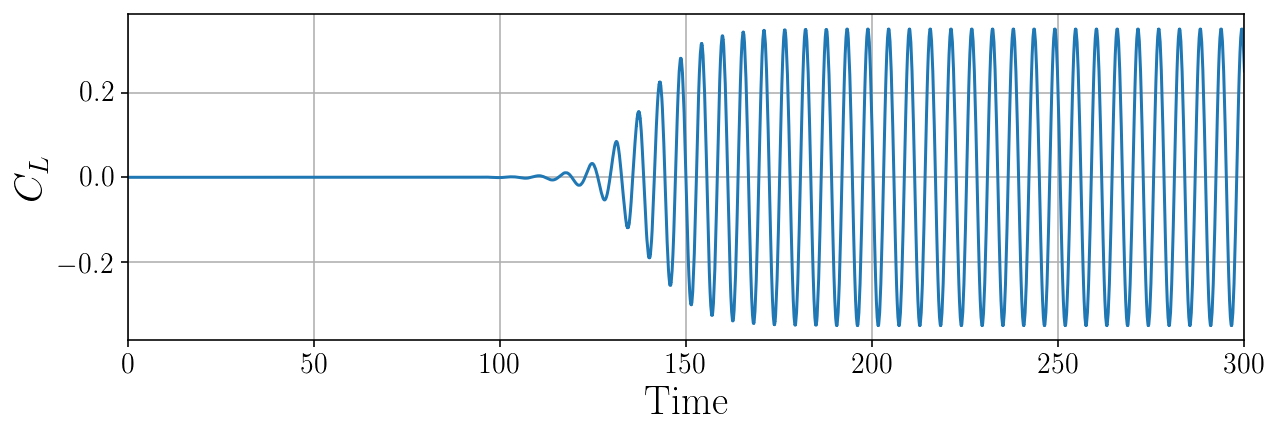

In [5]:
galerkin = sio.loadmat('models/galerkin9.mat')
L = galerkin['L']
with np.printoptions(precision=4, suppress=True):
    print(L)

# Load aerodynamic moments
data = np.loadtxt('./forceCoeffs.dat', skiprows=1)
t_coeff = data[:, 0]
CD = data[:, 1]
CL = data[:, 2]

# Get rid of duplicates
t_coeff, idx = np.unique(t_coeff, return_index=True)
CD = CD[idx]
CL = CL[idx]

plt.figure(figsize=(10, 3))
plt.plot(t_coeff, CL, label='DNS')
plt.xlabel('Time')
plt.ylabel(r'$C_L$')
plt.grid()
plt.xlim([0, 300])
plt.show()

### POD-Galerkin models

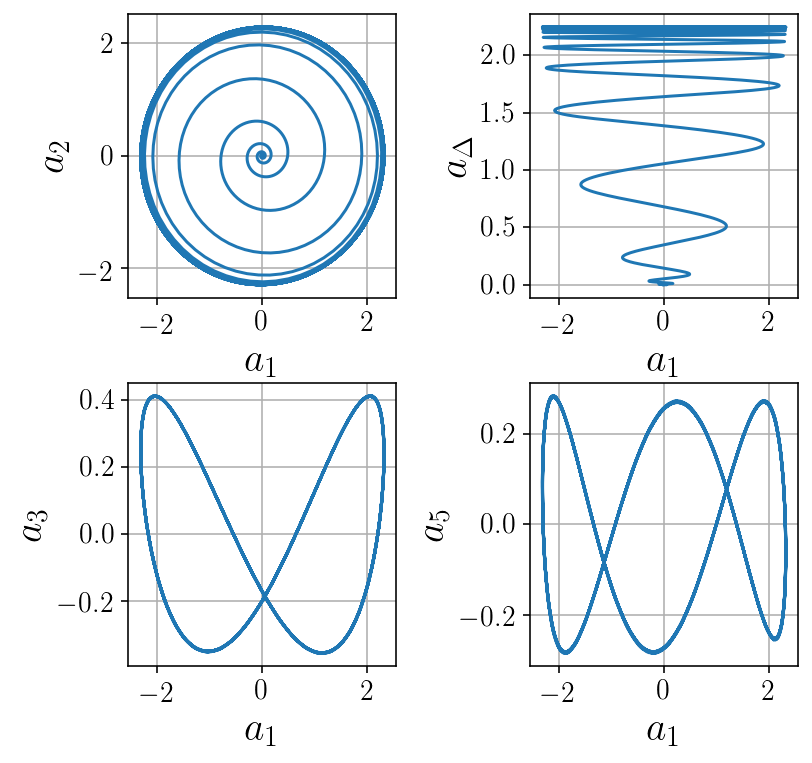

In [6]:
a = np.loadtxt('./a.dat')
t = a[:, 0]
a = a[:, 1:]
a_max = max(a[:, :2].flatten())

t_steady = 250

plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.plot(a[:, 0], a[:, 1])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_2$')
plt.grid()

plt.subplot(222)
plt.plot(a[:, 0], a[:, -1])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_\Delta$')
plt.grid()

plt.subplot(223)
plt.plot(a[t>t_steady, 0], a[t>t_steady, 2])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_3$')
plt.grid()

plt.subplot(224)
plt.plot(a[t>t_steady, 0], a[t>t_steady, 4])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_5$')
plt.grid()

plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

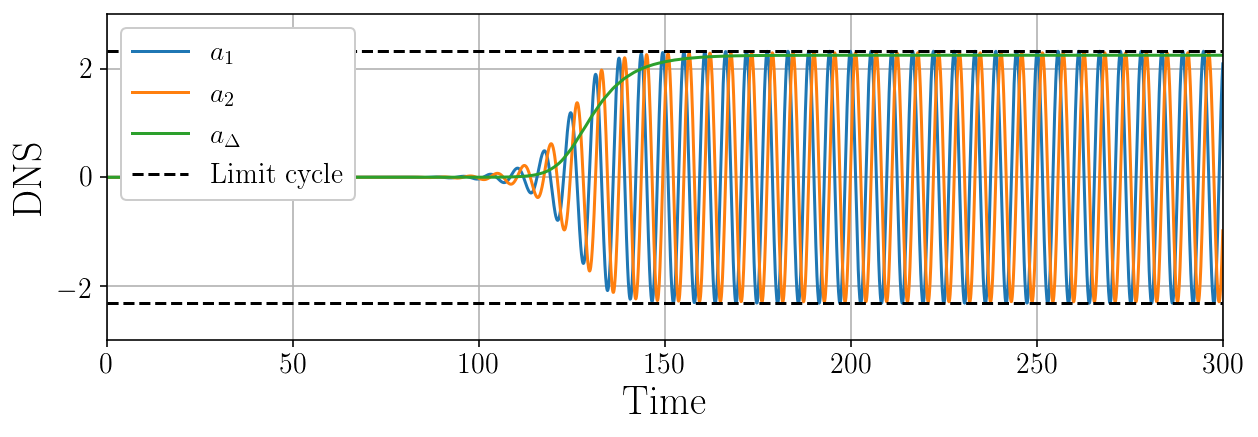

In [7]:
a_max = max(abs(a[:, 0]))

plt.figure(figsize=(10, 3))
plt.plot(t, a[:, [0, 1, -1]])
plt.plot([t[0], t[-1]], [a_max, a_max], 'k--')
plt.plot([t[0], t[-1]], [-a_max, -a_max], 'k--')
plt.ylim([-3, 3])
plt.xlim([0, 300])
plt.ylabel('DNS')
plt.xlabel('Time')
plt.legend(['$a_1$', '$a_2$', r'$a_\Delta$', 'Limit cycle'],
           loc=2, fancybox=True, framealpha=1, fontsize=14)
plt.grid()

#plt.savefig(fig_dir+'deane_model.svg')
plt.show()

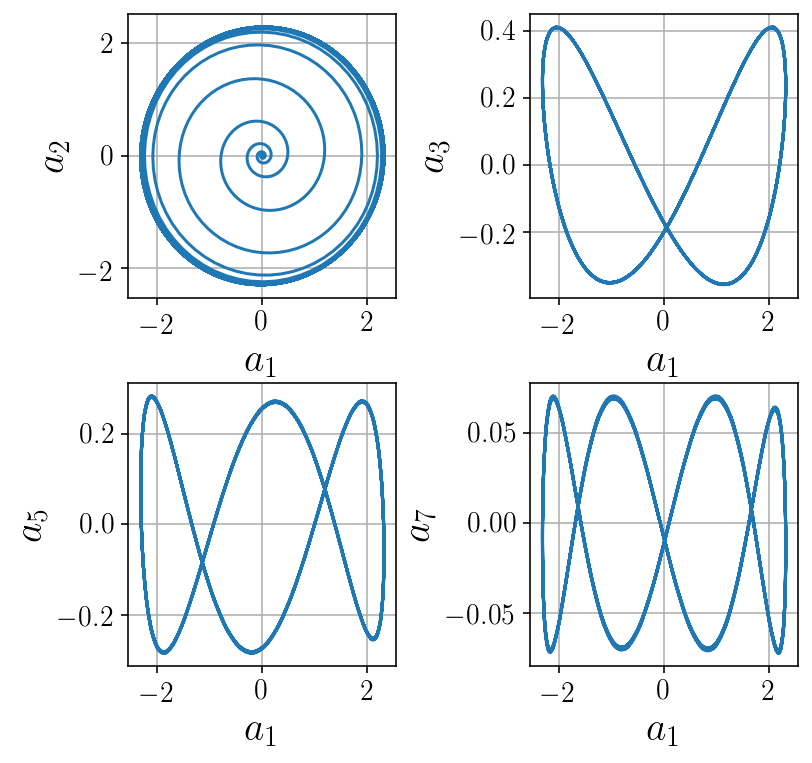

In [8]:

plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.plot(a[:, 0], a[:, 1])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_2$')
plt.grid()

plt.subplot(222)
plt.plot(a[t>t_steady, 0], a[t>t_steady, 2])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_3$')
plt.grid()

plt.subplot(223)
plt.plot(a[t>t_steady, 0], a[t>t_steady, 4])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_5$')
plt.grid()

plt.subplot(224)
plt.plot(a[t>t_steady, 0], a[t>t_steady, 6])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_7$')
plt.grid()

plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

### Compare 3-mode (shift-mode) POD-Galerkin model with DNS

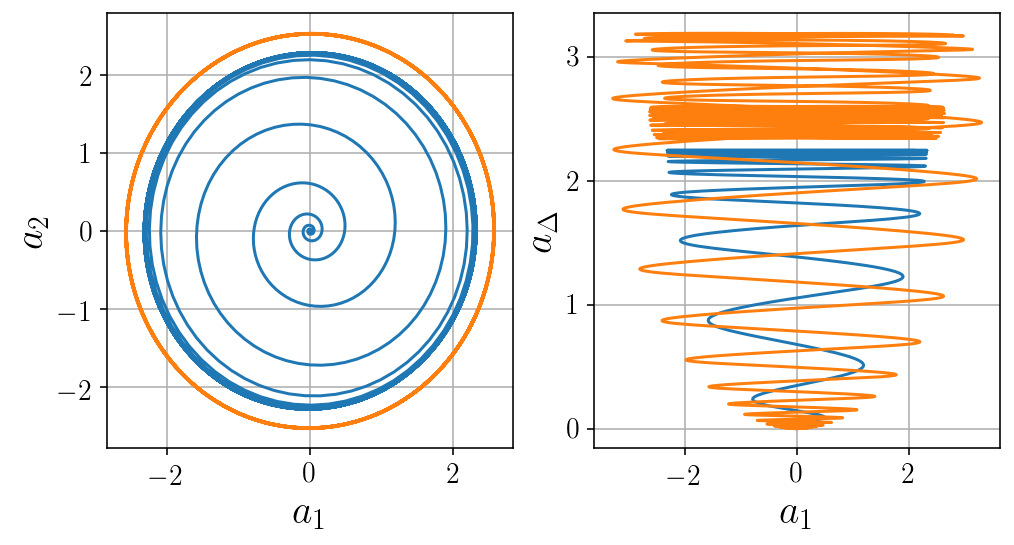

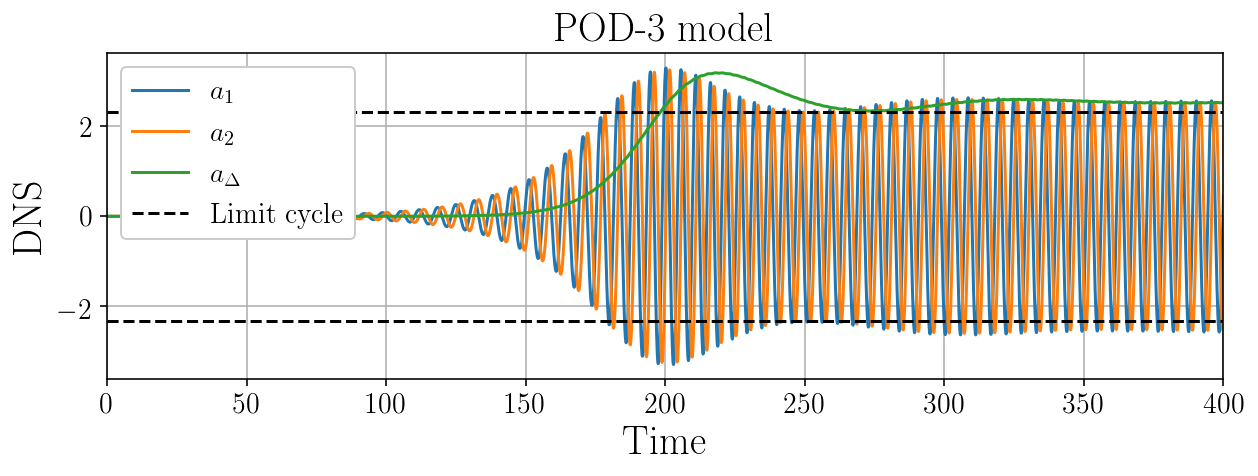

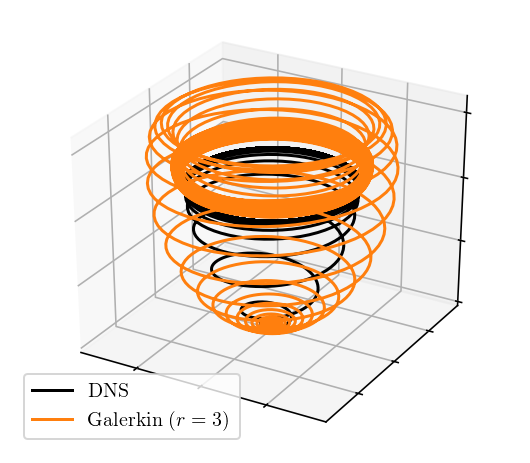

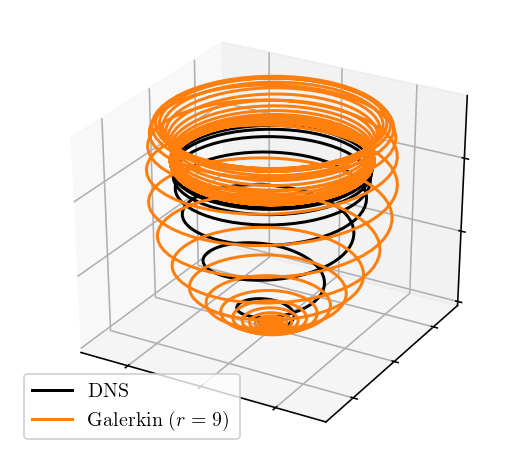

In [11]:
def pg_model(a, L, Q):
    """RHS of POD-Galerkin model, for time integration"""
    return (L @ a) + np.einsum('ijk,j,k->i', Q, a, a)

galerkin3 = sio.loadmat('models/galerkin3.mat')
model3 = lambda a, t: pg_model(a, galerkin3['L'], galerkin3['Q'])

galerkin9 = sio.loadmat('models/galerkin9.mat')
model9 = lambda a, t: pg_model(a, galerkin9['L'], galerkin9['Q'])

# Simulate Galerkin models
dt = 0.1
t_sim = np.arange(0, 500, dt)

# Generate initial condition from unstable eigenvectors
lamb, Phi = np.linalg.eig(galerkin9['L'])
idx = np.argsort(-np.real(lamb))
lamb, Phi = lamb[idx], Phi[:, idx]
a0 = np.real( 1e-3*Phi[:, :2] @ np.random.random((2)) )

a_galerkin3 = odeint(model3, a0[:3], t_sim)
a_galerkin9 = odeint(model9, a0[:9], t_sim)
# Plot Galerkin-3 results
t_steady_sim = 400

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(a[:, 0], a[:, 1])
plt.plot(a_galerkin3[t_sim>t_steady_sim, 0], a_galerkin3[t_sim>t_steady_sim, 1])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_2$')
plt.grid()

plt.subplot(122)
plt.plot(a[:, 0], a[:, -1])
plt.plot(a_galerkin3[:, 0], a_galerkin3[:, -1])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_\Delta$')
plt.grid()
plt.figure(figsize=(10, 3))
plt.plot(t_sim, a_galerkin3[:, [0, 1, -1]])
plt.plot([t_sim[0], t_sim[-1]], [a_max, a_max], 'k--')
plt.plot([t_sim[0], t_sim[-1]], [-a_max, -a_max], 'k--')
plt.xlim([0, 400])
plt.ylabel('DNS')
plt.xlabel('Time')
plt.legend(['$a_1$', '$a_2$', r'$a_\Delta$', 'Limit cycle'],
           loc=2, fancybox=True, framealpha=1, fontsize=14)
plt.grid()
plt.title("POD-3 model")

plt.show()
fig = plt.figure(figsize=(4.5, 4))
ax = fig.gca(projection='3d')
ax.plot(a[:, 0], a[:, 1], a[:, -1], 'k', label='DNS')
ax.plot(a_galerkin3[:, 0], a_galerkin3[:, 1], a_galerkin3[:, -1], c=mpl_colors[1], label='Galerkin ($r=3$)')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.legend()

fig = plt.figure(figsize=(4.5, 4))
ax = fig.gca(projection='3d')
ax.plot(a[:, 0], a[:, 1], a[:, -1], 'k', label='DNS')
ax.plot(a_galerkin9[:, 0], a_galerkin9[:, 1], a_galerkin9[:, -1], c=mpl_colors[1], label='Galerkin ($r=9$)')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.legend()


plt.show()

### Repeat comparison for 9-mode (shift-mode) POD-Galerkin model

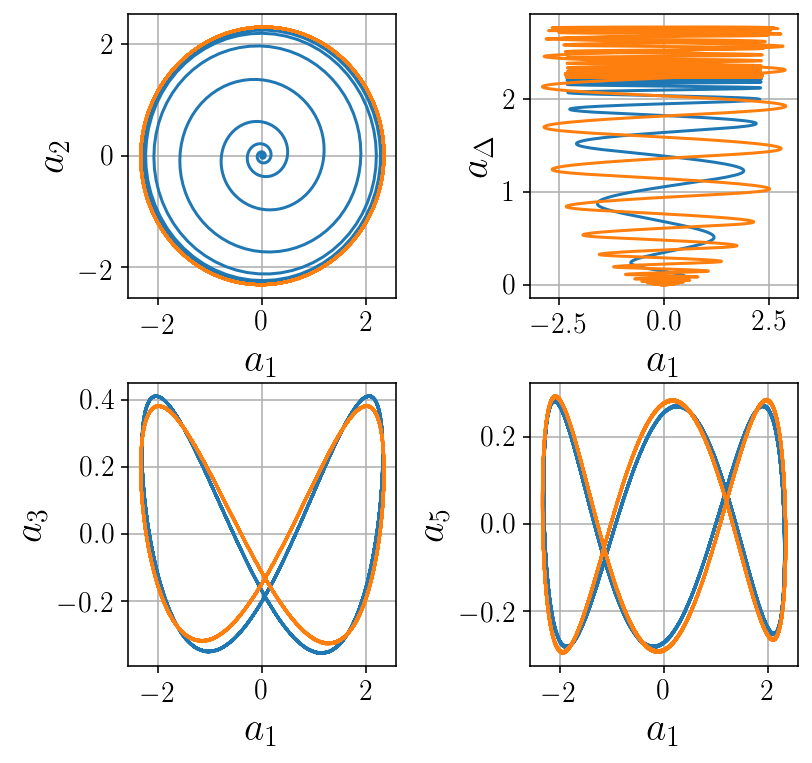

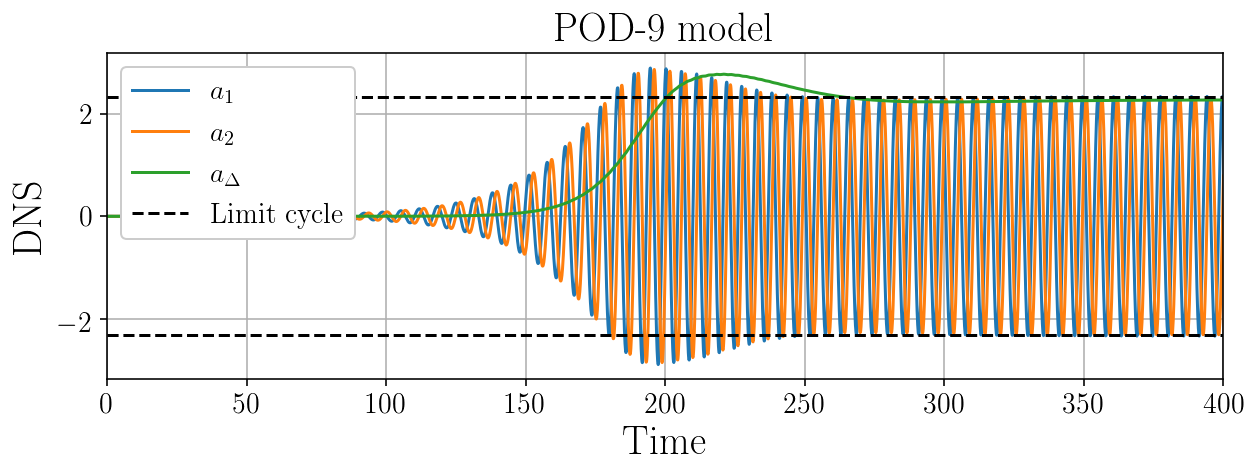

In [12]:
plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.plot(a[:, 0], a[:, 1])
plt.plot(a_galerkin9[t_sim>t_steady_sim, 0], a_galerkin9[t_sim>t_steady_sim, 1])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_2$')
plt.grid()

plt.subplot(222)
plt.plot(a[:, 0], a[:, -1])
plt.plot(a_galerkin9[:, 0], a_galerkin9[:, -1])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_\Delta$')
plt.grid()

plt.subplot(223)
plt.plot(a[t>t_steady, 0], a[t>t_steady, 2])
plt.plot(a_galerkin9[t_sim>t_steady_sim, 0], a_galerkin9[t_sim>t_steady_sim, 2])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_3$')
plt.grid()

plt.subplot(224)
plt.plot(a[t>t_steady, 0], a[t>t_steady, 4])
plt.plot(a_galerkin9[t_sim>t_steady_sim, 0], a_galerkin9[t_sim>t_steady_sim, 4])
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_5$')
plt.grid()

plt.subplots_adjust(wspace=0.5, hspace=0.3)

plt.figure(figsize=(10, 3))
plt.plot(t_sim, a_galerkin9[:, [0, 1, -1]])
plt.plot([t_sim[0], t_sim[-1]], [a_max, a_max], 'k--')
plt.plot([t_sim[0], t_sim[-1]], [-a_max, -a_max], 'k--')
plt.xlim([0, 400])
plt.ylabel('DNS')
plt.xlabel('Time')
plt.legend(['$a_1$', '$a_2$', r'$a_\Delta$', 'Limit cycle'],
           loc=2, fancybox=True, framealpha=1, fontsize=14)
plt.grid()
plt.title("POD-9 model")

plt.show()

# Invariant manifold model

In [13]:
r = 9
L = galerkin9['L']
Q = galerkin9['Q']

# Eigendecomposition of linear part of Galerkin model
evals, Phi = np.linalg.eig(L)

# Order by real part, so unstable evals are first
sort_idx = np.argsort(-np.real(evals))
evals = evals[sort_idx]
Phi = Phi[:, sort_idx]
Phi_inv = np.linalg.inv(Phi)

In [14]:
# Diagonalize model and check by integrating
from scipy.integrate import complex_ode

# Interaction with steady state  (Simpler if a_s = 0)
#Qs = np.einsum('ijk,k->ij', Q, a_s) + np.einsum('ikj,k->ij', Q, a_s)
#L_nf = Phi_inv @ ( L + Qs ) @ Phi
#Q_nf = np.einsum('nlm,ni,lj,mk->ijk', Q, np.conj(Phi), Phi, Phi) # Not sure why its conj and not inv, but this works

L_nf = Phi_inv @ L @ Phi
Q_nf = np.einsum('nlm,in,lj,mk->ijk', Q, Phi_inv, Phi, Phi)

model_nf = lambda t, b: pg_model(b, L_nf, Q_nf)

# Don't need to re-center on fixed point since we expanded around the steady state
#  (Otherwise this would be a0 - a_s)
b0 = Phi_inv @ a0[:r]

In [15]:
# Assume that the eigendecomposition actually did
#    diagonalize the upper block of the "normal form"
L11 = 1j*np.imag(L_nf[0, 0])
L22 = 1j*np.imag(L_nf[1, 1])

#L11 = L_nf[0, 0]
#L22 = L_nf[1, 1]

# Build the big matrix for the linear algebra problem
L_mat = np.zeros((3*r, 3*r), dtype='complex64')
L_mat[:r, :r] = 2*L11*np.eye(r) - L_nf
L_mat[r:-r, r:-r] = (L11+L22)*np.eye(r) - L_nf
L_mat[-r:,-r:] = 2*L22*np.eye(r) - L_nf

q_vec = np.zeros((3*r), dtype='complex64')
q_vec[:r] = Q_nf[:, 0, 0]
q_vec[r:-r] = Q_nf[:, 0, 1] + Q_nf[:, 1, 0]
q_vec[-r:] = Q_nf[:, 1, 1]

h_vec = np.linalg.inv(L_mat) @ q_vec
H = np.zeros((r, 3), dtype='complex64')
H[:, 0] = h_vec[:r]
H[:, 1] = h_vec[r:-r]
H[:, 2] = h_vec[-r:]

# Print analytic manifold equation
print(abs(H))

[[1.2030129e-07 4.1603837e-08 2.3466293e-09]
 [2.3466293e-09 4.1603837e-08 1.2030129e-07]
 [5.8910005e-02 3.8263455e-03 1.3287652e-04]
 [1.3287652e-04 3.8263455e-03 5.8910005e-02]
 [8.8669622e-04 7.8507870e-01 8.8669622e-04]
 [1.1483223e-05 6.0974548e-07 1.8397255e-07]
 [1.8397255e-07 6.0974548e-07 1.1483223e-05]
 [6.6886016e-04 1.7040549e-04 2.2871853e-05]
 [2.2871853e-05 1.7040549e-04 6.6886016e-04]]


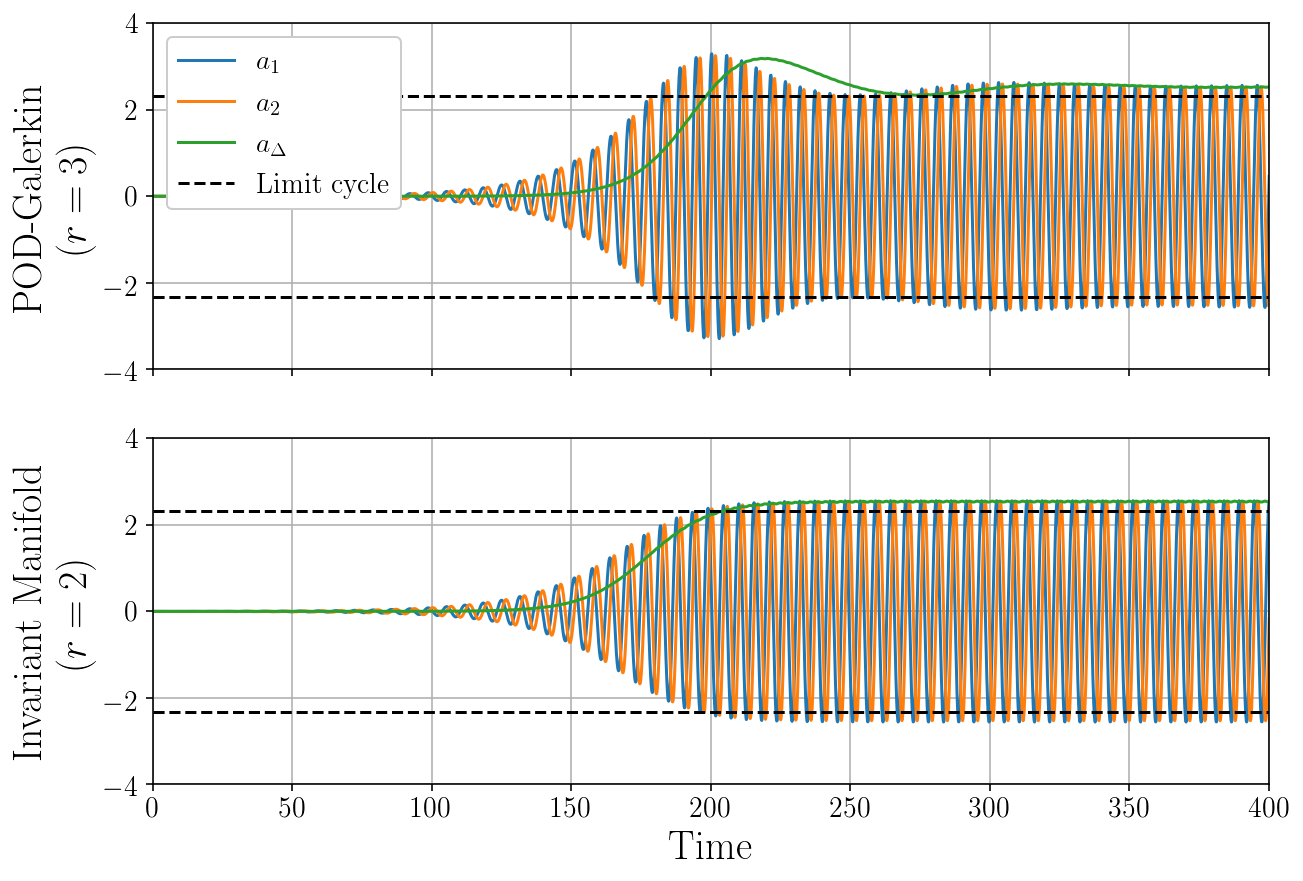

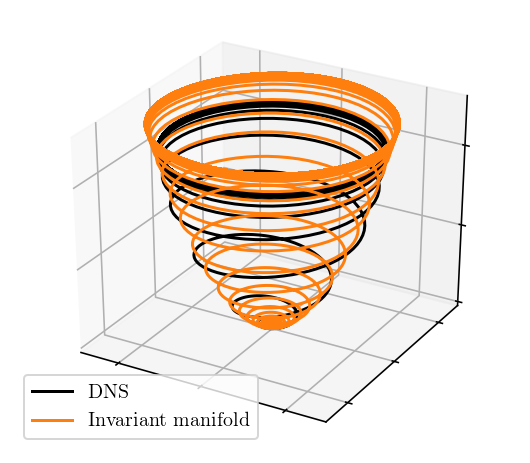

In [17]:
# Create a function for the manifold model (assuming leading two coordinates are driving)
order = 2
def manifold_eq(b, H, order):
    # 2D Polynomial library
    lib = np.array([b[0]**(i-j)*b[1]**j for i in range(2, order+1) for j in range(i+1)])
    b_poly = H @ lib  # Manifold equation
    b_poly[:2] = b[:2]  # Leave active coordinates unchanged
    return b_poly

def dae_model(b, L, Q, H, order):
    # Slave coordinates to the manifold and then evolve with the full model
    b_full = manifold_eq(b, H, order)
    db = pg_model(b_full, L, Q)
    return db[:2]

model = lambda t, b: dae_model(b, L_nf, Q_nf, H, order)

#b0 = Phi_inv @ (a0 - a_s)

b0_manifold = b0[:2]
integrator = complex_ode(model)
integrator.set_initial_value(b0_manifold, 0)

b_manifold = np.zeros((2, len(t_sim)), dtype='complex64')
idx = 0
while integrator.successful() and idx<len(t_sim)-1:
    idx+=1
    integrator.integrate(integrator.t+dt)
    b_manifold[:, idx] = integrator.y

#b_galerkin = odeint(model_nf, b0, t_sim)
b_full = np.zeros((r, len(t_sim)), dtype='complex64')
b_full[:2, :] = b_manifold
for i in range(len(t_sim)):
    b_full[:, i] = manifold_eq(b_manifold[:, i], H, order)  # Recover other variables
    
a_manifold = np.real( Phi @ b_full )

plt.figure(figsize=(10, 7))
plt.subplot(211)
#plt.plot(t_sim, a_galerkin[[0, 1, -1], :].T)
plt.plot(t_sim, a_galerkin3)
plt.plot([t_sim[0], t_sim[-1]], [a_max, a_max], 'k--')
plt.plot([t_sim[0], t_sim[-1]], [-a_max, -a_max], 'k--')
plt.ylim([-4, 4])
plt.xlim([0, 400])
plt.legend(['$a_1$', '$a_2$', r'$a_\Delta$', 'Limit cycle'],
           loc=2, fancybox=True, framealpha=1, fontsize=14)
plt.ylabel('POD-Galerkin\n($r=3$)')
plt.grid()

plt.gca().set_xticklabels([])

plt.subplot(212)#plt.plot(t_sim, a_galerkin[[0, 1, -1], :len(t_sim)].T)
plt.plot(t_sim, a_manifold[[0, 1, -1], :].T)
plt.plot([t_sim[0], t_sim[-1]], [a_max, a_max], 'k--')
plt.plot([t_sim[0], t_sim[-1]], [-a_max, -a_max], 'k--')
plt.grid()
plt.ylabel('Invariant Manifold\n($r=2$)')
plt.ylim([-4, 4])
plt.xlim([0, 400])
plt.xlabel('Time')

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4.5, 4))
ax = fig.gca(projection='3d')
ax.plot(a[:, 0], a[:, 1], a[:, -1], 'k', label='DNS')
ax.plot(a_manifold[0, :], a_manifold[1, :], a_manifold[-1, :],
        c=mpl_colors[1], label='Invariant manifold')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.legend()

plt.show()

# Cubic SINDy model

In [18]:
# Nonlinear correlations for POD reconstruction
steady_idx = t>250
order = 4

# Build polynomial library
Theta = []
for i in range(2, order+1):
    for j in range(i+1):
        Theta.append(a[:, 0]**(i-j) * a[:, 1]**j)
Theta = np.array(Theta).T

H_poly = np.zeros((r, Theta.shape[1]))
H_poly[2:, :] = tls_sindy(Theta, a[:, 2:], l1=1e-3).T

# Compare correlations to manifold equation
a_poly = np.zeros(a.shape)
for i in range(a.shape[0]):
    a_poly[i, :] = manifold_eq(a[i, :], H_poly, order)

plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.plot(a[:, 0], a[:, 1], c='k')
plt.plot(a_poly[:, 0], a_poly[:, 1], '--',
         label='Quadratic regression', c=mpl_colors[1])
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_2$', fontsize=16)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid()

plt.subplot(222)
plt.plot(a[steady_idx, 0], a[steady_idx, 2], c='k')
plt.plot(a_poly[steady_idx, 0], a_poly[steady_idx, 2], '--', c=mpl_colors[1])
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_3$', fontsize=16)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
#plt.legend()
plt.grid()

plt.subplot(223)
plt.plot(a[steady_idx, 0], a[steady_idx, 4], c='k')
plt.plot(a_poly[steady_idx, 0], a_poly[steady_idx, 4], '--', c=mpl_colors[1])
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_5$', fontsize=16)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid()

plt.subplot(224)
plt.plot(a[steady_idx, 0], a[steady_idx, 6], c='k')
plt.plot(a_poly[steady_idx, 0], a_poly[steady_idx, 6], '--', c=mpl_colors[1])
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_7$', fontsize=16)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid()

#plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

NameError: name 'tls_sindy' is not defined

### Sparse regression

In [103]:
# Compute time derivatives of leading terms

da = np.zeros([a.shape[0], 2])
da[1:-1, :] = (a[2:, :2] - a[:-2, :2])/(2*(t[1] - t[0])) 
da[0, :] = (a[1, :2] - a[0, :2])/(t[1] - t[0])
da[-1, :] = (a[-1, :2] - a[-2, :2])/(t[1] - t[0])

# Build polynomial library
order = 3
Theta = []
for i in range(1, order+1):
    for j in range(i+1):
        Theta.append(a[:, 0]**(i-j) * a[:, 1]**j)
Theta = np.array(Theta).T

Xi = tls_sindy(Theta, da, l1=1e-2)
print(Xi)

[[ 0.08708748  0.74401065]
 [-0.77139784  0.17861346]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.01482987  0.06666004]
 [-0.06632837 -0.03457667]
 [-0.01285367  0.07001284]
 [-0.06900932 -0.03640394]]


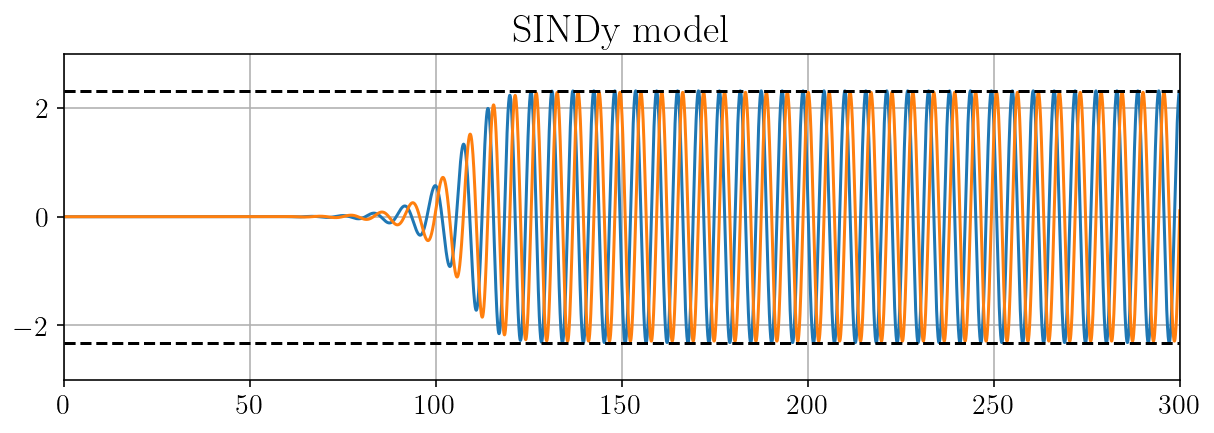

In [104]:
def sindy_model(a, Xi):
    da = np.zeros(2)
    idx = 0
    for i in range(1, order+1):
        for j in range(i+1):
            da += (a[0]**(i-j) * a[1]**j )*Xi[idx, :]
            idx += 1
    return da

a_sindy = np.zeros([len(t_sim), a.shape[1]])
a_sindy[:, :2] = odeint(lambda a, t: sindy_model(a, Xi), a[300, :2], t_sim)
#a_sindy[:, :2] = odeint(lambda a, t: sindy_model(a, Xi), a0[:2], t_sim)
# Reconstruct other degrees of freedom from manifold equation
for i in range(len(t_sim)):
    a_sindy[i, :] = manifold_eq(a_sindy[i, :], H_poly, order=4)
    
plt.figure(figsize=(10, 3))
plt.plot(t_sim, a_sindy[:, :2])
plt.plot([t_sim[0], t_sim[-1]], [a_max, a_max], 'k--')
plt.plot([t_sim[0], t_sim[-1]], [-a_max, -a_max], 'k--')
plt.ylim([-3, 3])
plt.xlim([0, 300])
plt.title('SINDy model')
plt.grid()

plt.show()

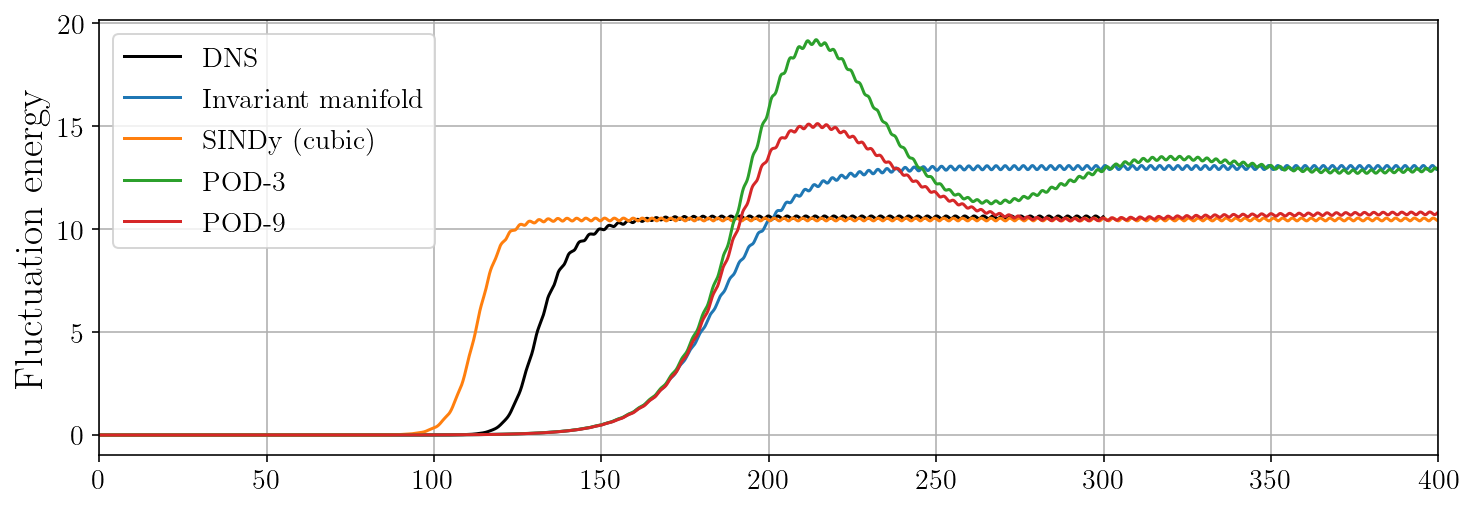

In [105]:
# Energy plots

# Energy of the models
E = np.sum(a**2, axis=1)
E_galerkin3 = np.sum(a_galerkin3**2, axis=1)
E_galerkin9 = np.sum(a_galerkin9**2, axis=1)
E_manifold = np.sum(a_manifold**2, axis=0)
E_sindy = np.sum(a_sindy**2, axis=1)

plt.figure(figsize=(12, 4))
plt.plot(t, E, 'k', label='DNS')
plt.plot(t_sim, E_manifold, label='Invariant manifold')
#plt.plot(t_sim, E_quadratic, label='Quadratic')
#plt.plot(t_sim, E_cubic, label='Cubic')
plt.plot(t_sim, E_sindy, label=r'SINDy (cubic)')
plt.plot(t_sim, E_galerkin3, label='POD-3')
plt.plot(t_sim, E_galerkin9, label='POD-9')

plt.legend(fontsize=14, loc=2)
plt.grid()
#plt.gca().set_yscale('log')
plt.xlim([0, 400])
plt.ylabel('Fluctuation energy')
#plt.gca().set_yscale('log')
#plt.ylim([1e-8, 1e3])
plt.show()

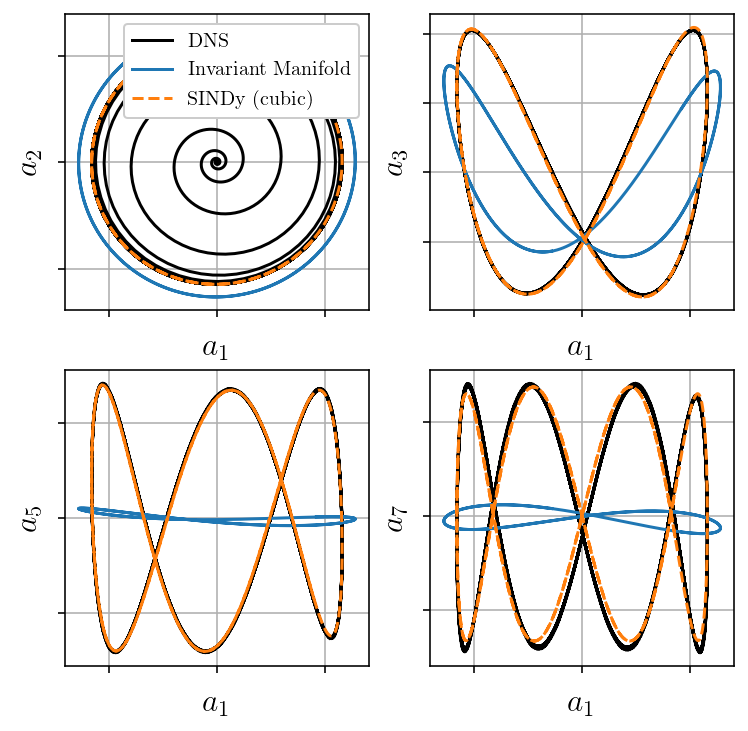

In [107]:
steady_sim = (t_sim > 250)*(t_sim <260)

plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.plot(a[:, 0], a[:, 1], 'k', label='DNS')
plt.plot(a_manifold[0, steady_sim], a_manifold[1, steady_sim], label='Invariant Manifold')
plt.plot(a_sindy[steady_sim, 0], a_sindy[steady_sim, 1], '--', label='SINDy (cubic)')
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_2$', fontsize=16)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.legend(loc=1, fancybox=True, framealpha=1)
plt.grid()

plt.subplot(222)
plt.plot(a[steady_idx, 0], a[steady_idx, 2], 'k', label='DNS')
plt.plot(a_manifold[0, steady_sim], a_manifold[2, steady_sim], label='Invariant Manifold')
plt.plot(a_sindy[steady_sim, 0], a_sindy[steady_sim, 2], '--', label='SINDy (cubic)')
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_3$', fontsize=16)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid()

plt.subplot(223)
plt.plot(a[steady_idx, 0], a[steady_idx, 4], 'k')
plt.plot(a_manifold[0, steady_sim], a_manifold[4, steady_sim], label='Invariant Manifold')
plt.plot(a_sindy[steady_sim, 0], a_sindy[steady_sim, 4], '--', label='SINDy (cubic)')
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_5$', fontsize=16)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid()

plt.subplot(224)
plt.plot(a[steady_idx, 0], a[steady_idx, 6], 'k')
plt.plot(a_manifold[0, steady_sim], a_manifold[6, steady_sim], label='Invariant Manifold')
plt.plot(a_sindy[steady_sim, 0], a_sindy[steady_sim, 6], '--', label='SINDy (cubic)')
plt.xlabel('$a_1$', fontsize=16)
plt.ylabel('$a_7$', fontsize=16)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid()

#plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

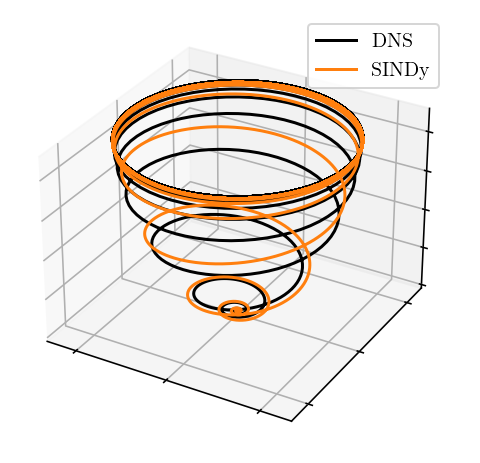

In [108]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4.5, 4))
ax = fig.gca(projection='3d')
ax.plot(a[:, 0], a[:, 1], a[:, -1], 'k', label='DNS')
#ax.plot(a_manifold[0, :], a_manifold[1, :], a_manifold[-1, :], label='Invariant Manifold')
ax.plot(a_sindy[:, 0], a_sindy[:, 1], a_sindy[:, -1], '-', c=mpl_colors[1], label='SINDy')
#ax.set_xlabel(r'$a_1$')
#ax.set_ylabel(r'$a_2$')
#ax.set_zlabel(r'$a_\Delta$')
#ax.set_xticks([-2, 0, 2])
#ax.set_yticks([-2, 0, 2])
#ax.set_zticks([0, 1, 2])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.legend()

plt.show()